# Loading Custom Modules

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
sys.path.append('C:/Users/hkimr/Desktop/RPS Project/RPS-Deep-Learning/modules')

from DataLoaders import *
from Visualizations import *
from TrainTest import *

# Defining DataLoaders

## Hyperparameters

In [2]:
batch_size = 150
learning_rate = 0.001
n_epochs = 25
output_neurons = 3

In [3]:
train_transform = defineDataTransform("train")
test_transform = defineDataTransform("test")

train_loader = createDataLoader("data/rps", train_transform, batch_size = batch_size)
test_loader = createDataLoader("data/rps-test-set", test_transform, test_loader = True)

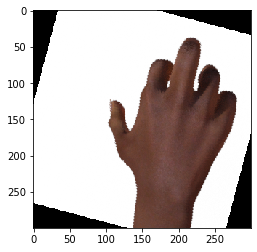

In [4]:
showNumpyAsImg(next(iter(train_loader))[0][0])

# Defining Network Architecture

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 15)
        self.conv2 = nn.Conv2d(6, 16, 15)
        self.pool = nn.MaxPool2d(5, 5)
        
        self.fc1 = nn.Linear(16*8*8, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, output_neurons)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 16*8*8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [6]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 15) # (input_channel_size, output_channel_size, kernel_size)
#         self.conv2 = nn.Conv2d(6, 16, 15)
#         self.conv3 = nn.Conv2d(16, 16, 15)
#         self.pool = nn.MaxPool2d(3, 3) # (kernel_size, stride)
        
#         self.fc1 = nn.Linear(16*4*4, 120)
#         self.fc2 = nn.Linear(120, 60)
#         self.fc3 = nn.Linear(60, output_neurons)
    
#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
        
#         x = x.view(-1, 16*4*4) #Flattening the tensor, -1 is the batch size
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
        
#         return x

# Training The Network

In [7]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
trainNetwork(model, train_loader, n_epochs, optimizer)

Epoch 1, Loss: 18.172140955924988, Final Batch Loss: 0.9343408942222595
Epoch 2, Loss: 13.33656531572342, Final Batch Loss: 0.5837117433547974
Epoch 3, Loss: 10.060293972492218, Final Batch Loss: 0.39538484811782837
Epoch 4, Loss: 7.485622018575668, Final Batch Loss: 0.32121121883392334
Epoch 5, Loss: 5.075527250766754, Final Batch Loss: 0.31011897325515747
Epoch 6, Loss: 3.1419883891940117, Final Batch Loss: 0.2517748475074768
Epoch 7, Loss: 1.9941971898078918, Final Batch Loss: 0.12327888607978821
Epoch 8, Loss: 1.3566645234823227, Final Batch Loss: 0.08246519416570663
Epoch 9, Loss: 1.1520445421338081, Final Batch Loss: 0.060483358800411224
Epoch 10, Loss: 0.7571790777146816, Final Batch Loss: 0.026712000370025635
Epoch 11, Loss: 0.5996445110067725, Final Batch Loss: 0.022066228091716766
Epoch 12, Loss: 0.39249833952635527, Final Batch Loss: 0.008059638552367687
Epoch 13, Loss: 0.38871066085994244, Final Batch Loss: 0.013254409655928612
Epoch 14, Loss: 0.39865204133093357, Final Bat

# Saving The Model

In [11]:
torch.save(model.state_dict(), f'saved_models/CNN_150BS_0.001LR_25E_FINAL')

# Evaluating The Model

In [12]:
model = CNN()
loadModel(model, "CNN_150BS_0.001LR_25E_FINAL")

In [13]:
evaluateNetwork(model, test_loader)

[[ 79  21  24]
 [  0 122   2]
 [  0   0 124]]
              precision    recall  f1-score   support

           0    1.00000   0.63710   0.77833       124
           1    0.85315   0.98387   0.91386       124
           2    0.82667   1.00000   0.90511       124

    accuracy                        0.87366       372
   macro avg    0.89327   0.87366   0.86576       372
weighted avg    0.89327   0.87366   0.86576       372

